#### Purpose of this Notebook
- To examine socioeconomic differences in access to preventive healthcare in Georgia and assess whether groups with higher diabetes prevalence also experience systematically lower access to prevention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Load your prepared data
df = pd.read_csv("brfss_diabetes_cleaned.csv")


In [2]:
df.head()

,Year,Locationabbr,Locationdesc,Topic,Question,Break_Out_Category,Break_Out,Sample_Size,Data_value,Question_Role,Variable_Name
0,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,"1,242",12.8,Outcome (Diabetes),diabetes_status
1,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,46,0.6,Outcome (Diabetes),diabetes_status
2,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,"5,779",84.1,Outcome (Diabetes),diabetes_status
3,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,175,2.5,Outcome (Diabetes),diabetes_status
4,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Sex,Male,502,13.0,Outcome (Diabetes),diabetes_status


#### Define Preventive Healthcare Variables

In [3]:
# Define the target question
checkup_question = "About how long has it been since you last visited a doctor for a routine checkup?"

# Filter rows that match the question
df_checkup = df.query("Question == @checkup_question").copy()

# Inspect the shape (rows, columns)
print("Shape of df_checkup:", df_checkup.shape)

Shape of df_checkup: (1941, 11)


#### Preventive care by income

In [4]:
# Filter rows for Household Income category
df_checkup_income = df_checkup[
    df_checkup["Break_Out_Category"] == "Household Income"
].copy()

print(df_checkup_income.shape)


(427, 11)


#### Plot of preventive care acess by income

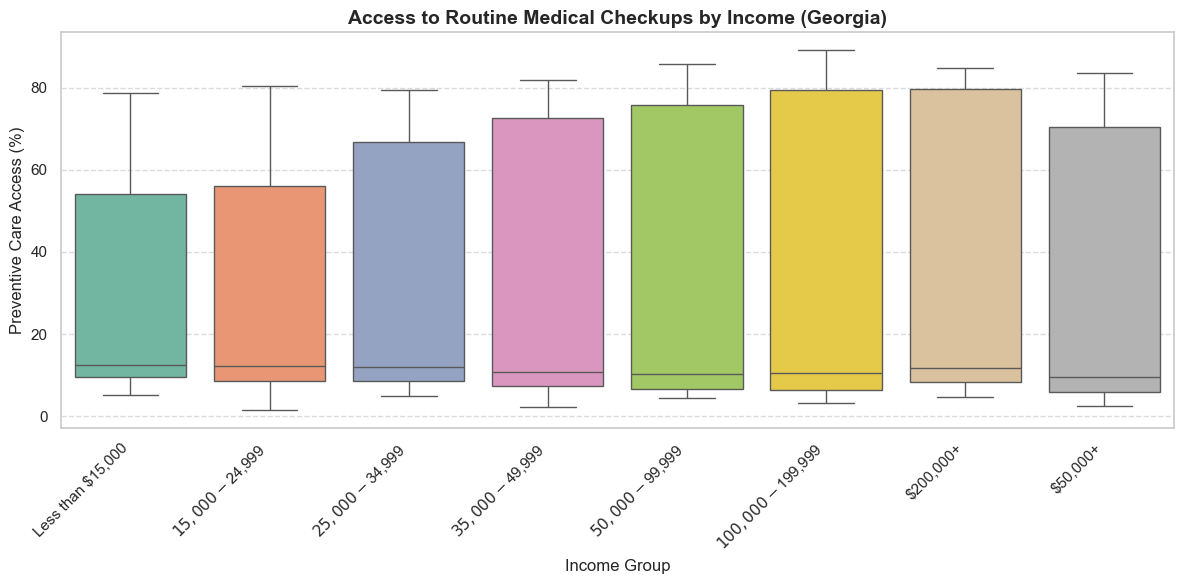

In [5]:
# Set a consistent style
sns.set_theme(style="whitegrid")

# Boxplot of preventive care access by income
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_checkup_income,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # adds distinct colors for each income group
)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.ylabel("Preventive Care Access (%)", fontsize=12)
plt.xlabel("Income Group", fontsize=12)
plt.title("Access to Routine Medical Checkups by Income (Georgia)", fontsize=14, weight="bold")

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Interpretation.
- Access to routine medical checkups in Georgia shows that those with lower-income groups reporting systematically lower preventive care access. When considered alongside the observed income gradient in diabetes prevalence, this pattern suggests a mismatch between health risk and access to prevention. This motivates a causal investigation into whether improving preventive care access can reduce socioeconomic disparities in diabetes risk.

#### Preventive Care Access by Education

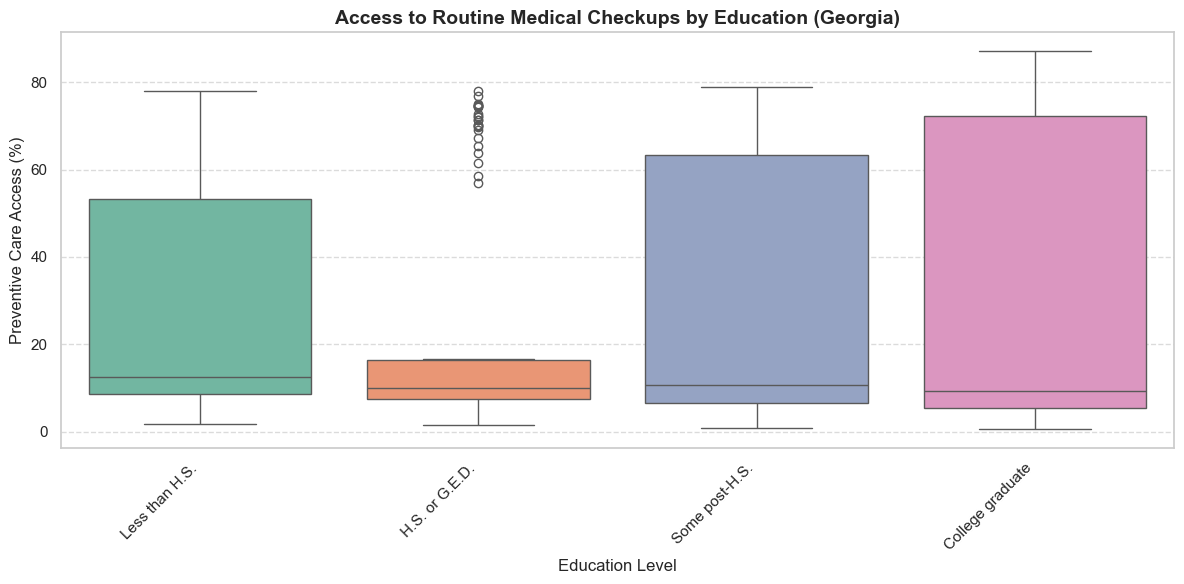

In [6]:
# Set a consistent style
sns.set_theme(style="whitegrid")

# Filter rows for Education category
df_checkup_edu = df_checkup.query("Break_Out_Category == 'Education Attained'").copy()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_checkup_edu,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # adds distinct colors for each education level
)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.ylabel("Preventive Care Access (%)", fontsize=12)
plt.xlabel("Education Level", fontsize=12)
plt.title("Access to Routine Medical Checkups by Education (Georgia)", fontsize=14, weight="bold")

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Interpretation:
- The boxplot shows a clear positive gradient between education and access to routine medical checkups in Georgia. Individuals with lower educational attainment (less than high school or high school/GED) exhibit low median access and high within-group inequality indicating that preventive care is limited for most with access concentrated among a small subset. In contrast, individuals with post-secondary and college education display higher and more widely distributed access to preventive care. 

#### Preventive Care Access by Race/Ethnicity

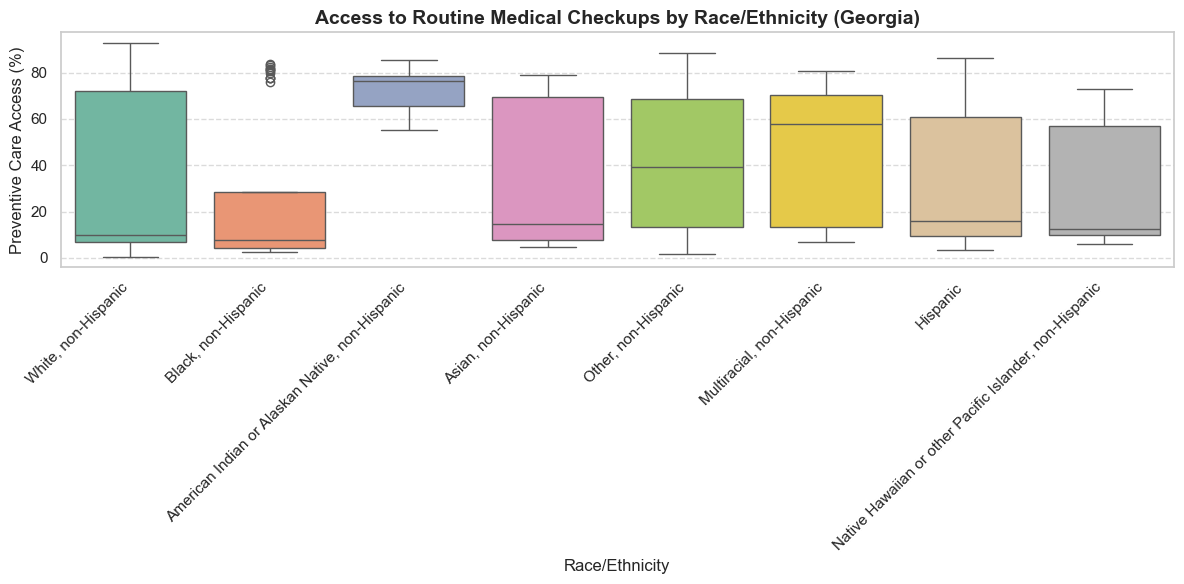

In [7]:
# Set a consistent style
sns.set_theme(style="whitegrid")

# Filter rows for Race/Ethnicity category
df_checkup_race = df_checkup.query("Break_Out_Category == 'Race/Ethnicity'").copy()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_checkup_race,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # distinct colors for each race/ethnicity group
)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.ylabel("Preventive Care Access (%)", fontsize=12)
plt.xlabel("Race/Ethnicity", fontsize=12)
plt.title("Access to Routine Medical Checkups by Race/Ethnicity (Georgia)", fontsize=14, weight="bold")

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [8]:
insurance_question = "Do you have any kind of health care coverage?"

df_ins = df[df["Question"] == insurance_question].copy()

### Key QUESTION
#### If prevention access were improved, would it actually reduce diabetes prevalence and for whom?